In [45]:
from pprint import pprint

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import explore as e
import prepare as p 

import nltk
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

### Original DF

In [2]:
df = pd.read_json('data.json')

In [3]:
df = p.create_df(df)
df

,repo,language,original,lemmatized
0,acidanthera/AppleALC,C++,AppleALC\n========\n\n[![Build Status](https:/...,applealc acidanthera applealc workflow ci badg...
1,gongjianhui/AppleDNS,Python,# Final AppleDNS Pro\n\nAppleDNS 通过收集 Apple 在中...,final appledns pro appledns cdn itunes icloud ...
2,tomaz/appledoc,Objective-C,About appledoc\n==============\n\n**IMPORTANT ...,appledoc important notice collaborator needed ...
3,robovm/apple-ios-samples,Objective-C,# Mirror of Apple's iOS samples\n\nThis reposi...,mirror io sample repository mirror io sample l...
4,appleseedhq/appleseed,C++,# appleseed [![Build Status](https://travis-ci...,appleseed travis ci appleseedhq appleseed svg ...
...,...,...,...,...
481,PatMurrayDEV/apple-music-history,JavaScript,[![Netlify Status](https://api.netlify.com/api...,netlify api netlify api v1 badge e207d990 1ee1...
482,antongorodezkiy/codeigniter-apns,PHP,"Codeigniter-apns\n(c) 2012, Anton Gorodezkiy\n...",codeigniter apns c 2012 anton gorodezkiy codei...
484,lprhodes/homebridge-apple-tv,JavaScript,# Homebridge Apple TV\n\n## Introduction\nWelc...,homebridge tv welcome tv plugin homebridge nfa...
485,lvsti/CoreMediaIO-DAL-Example,C++,# CoreMediaIO-DAL-Example\n\nModernized and ex...,coremediaio dal example modernized extended co...


In [4]:
df.language.value_counts()

Swift          76
JavaScript     59
Objective-C    56
Python         45
C              34
Java           30
C++            20
Shell          19
PHP            18
C#             11
Name: language, dtype: int64

---

### Preparing Dataframe for modeling

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
bag_of_words = cv.fit_transform(df.lemmatized)
bag_of_words

<368x22870 sparse matrix of type '<class 'numpy.int64'>'
	with 80387 stored elements in Compressed Sparse Row format>

In [6]:
bag_of_words.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [7]:
pd.DataFrame(bag_of_words.todense(), columns=cv.get_feature_names()).head()

,00,000,0000,000000,00000002,000035590,0001,00010000,00040000,0008,...,zxystd,zy,zybuluo,zynaptiqs,zypper,zythum,zz20rxc,zzanehip,zzpiglet,zzzzbh
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
rows = ['C#', 'PHP', 'Shell', 'C\+\+']

In [9]:
for row in rows:
    df = df[df["language"].str.contains(row) == False]

In [10]:
df.language.value_counts()

Swift          76
JavaScript     59
Objective-C    56
Python         45
C              34
Java           30
Name: language, dtype: int64

---

### Decision Tree Classifier

In [11]:
cv = CountVectorizer()
X = cv.fit_transform(df.lemmatized)
y = df.language

#### Train

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=.20, 
                                                   random_state=123)

In [40]:
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train, y_train)

tree.score(X_train, y_train)

0.7

In [41]:
(tree.predict(X_train) ==y_train).mean()

0.7

#### Test

In [42]:
tree.score(X_test, y_test)

0.6166666666666667

~55% Accuracy on test data

---

### Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=.2, 
                                                   random_state=12)

In [18]:
rf = RandomForestClassifier(max_depth=5)

#### Train

In [19]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [20]:
y_pred = rf.predict(X_train)

y_pred_proba = rf.predict_proba(X_train)

In [21]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.77


In [22]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           C       1.00      0.62      0.77        29
        Java       1.00      0.41      0.59        29
  JavaScript       0.94      0.76      0.84        42
 Objective-C       0.61      0.75      0.67        44
      Python       0.97      0.83      0.90        36
       Swift       0.65      0.98      0.78        60

    accuracy                           0.77       240
   macro avg       0.86      0.73      0.76       240
weighted avg       0.83      0.77      0.76       240



#### Test

In [23]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf.score(X_test, y_test)))

Accuracy of random forest classifier on test set: 0.43


---

## KNN Model

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=.2, 
                                                   random_state=12)

In [26]:
# knn object
# weights = ['uniform', 'density']
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')


In [27]:
# fit
knn.fit(X_train, y_train)

KNeighborsClassifier()

#### Train

In [28]:
# make predictions
y_pred = knn.predict(X_train)


In [29]:
# estimatre probas
y_pred_proba = knn.predict_proba(X_train)

In [30]:
# eval model 
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.48


In [31]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           C       0.62      0.28      0.38        29
        Java       0.23      0.93      0.37        29
  JavaScript       0.59      0.45      0.51        42
 Objective-C       0.59      0.39      0.47        44
      Python       0.90      0.25      0.39        36
       Swift       0.88      0.58      0.70        60

    accuracy                           0.48       240
   macro avg       0.63      0.48      0.47       240
weighted avg       0.67      0.48      0.50       240



#### Test

In [32]:
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of KNN classifier on test set: 0.27


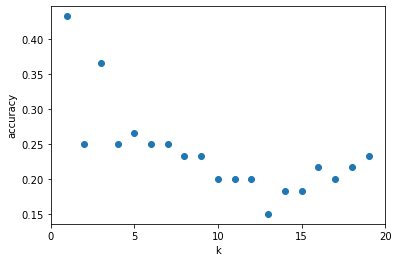

In [33]:
import matplotlib.pyplot as plt
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()